<a href="https://colab.research.google.com/github/dbtjr1103/Basic_practice/blob/main/RNN_%E1%84%80%E1%85%A1%E1%86%B7%E1%84%89%E1%85%A5%E1%86%BC%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8(%EB%B3%B5%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 복습

토큰화, 어간추출, 불용어 -> 문장길이

토큰화, 어간추출을 같이 할 수 있는 okt 사용

불용어 제거

Indexing, text -> sequences 
: 인덱스 리턴

Padding -> 문장길이 맞춰주기

    [[1,0,0,0,0,0],[2,3,4,5,6,7],[8,9,0,0,0,0],[10,11,0,0,0,0]]

모델링

    Embedding(단어개수(vocab_size), 단어벡터의크기)    => (단어)숫자를 (단어)벡터로 
    RNN LAYER(units=128, input_shape = (sequence_length(=6, 패딩할때 정함), 단어벡터의 크기)
    Dense(1, activation='sigmoid')

결과

    [[0.9],[0.7],[0.1],[0.2]]
    정답 [[1],[1],[0],[0]] 과 비교하며 w 계산

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import tensorflow as tf 

In [44]:
train_sen = [    
    "재미있다!!!!", 
    "추천! 꼭 다시 보고 싶은 영화",
    "별로다ㅜㅜakdfj1259", 
    "노잼"]

In [ ]:
train_y = np.array([1,1,0,0])

In [ ]:
# cleaning
import re

temp = []
for sen in train_sen :
    sen = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\s]", "", sen)
    temp.append(sen)

temp

['재미있다', '추천 꼭 다시 보고 싶은 영화', '별로다ㅜㅜ', '노잼']

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 3.4 MB/s 
     |████████████████████████████████| 465 kB 88.6 MB/s 


In [ ]:
# 토큰화
from konlpy.tag import Okt
okt = Okt()

for sen in temp:
    print(okt.morphs(sen))

['재미있다']
['추천', '꼭', '다시', '보고', '싶은', '영화']
['별로', '다', 'ㅜㅜ']
['노잼']


In [ ]:
# 토큰화 비교
okt = Okt()

clean_x = []
for sen in temp:
    clean_x.append(okt.morphs(sen, stem=True))

clean_x

[['재미있다'], ['추천', '꼭', '다시', '보고', '싶다', '영화'], ['별로', '다', 'ㅜㅜ'], ['노잼']]

In [ ]:
# 토큰 -> 숫자
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_x)

In [ ]:
tokenizer.word_index

{'재미있다': 1,
 '추천': 2,
 '꼭': 3,
 '다시': 4,
 '보고': 5,
 '싶다': 6,
 '영화': 7,
 '별로': 8,
 '다': 9,
 'ㅜㅜ': 10,
 '노잼': 11}

In [ ]:
word_encoding = tokenizer.texts_to_sequences(clean_x)
word_encoding

[[1], [2, 3, 4, 5, 6, 7], [8, 9, 10], [11]]

In [ ]:
# 문장 길이 맞추기 -> padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_LENGTH = 10

padded = pad_sequences(word_encoding, maxlen = MAX_LENGTH, padding = 'post') # post면 패딩이 뒤로 생김
padded

array([[ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  3,  4,  5,  6,  7,  0,  0,  0,  0],
       [ 8,  9, 10,  0,  0,  0,  0,  0,  0,  0],
       [11,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int32)

TEST DATA


In [46]:
test_sen = [    
    "별로", "재미있는 영화!!!!", "추천 꿀잼"]

test_y = [0,1,1]

In [ ]:
clean_test = []
for sen in test_sen :  
    sen = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\s]", "", sen)
    clean_test.append(okt.morphs(sen, stem=True))

clean_test

[['별로'], ['재미있다', '영화'], ['추천', '꿀잼']]

In [ ]:
word_encoding_test = tokenizer.texts_to_sequences(clean_test)
word_encoding_test

[[8], [1, 7], [2]]

In [31]:
MAX_LENGTH = 10 

padded_test = pad_sequences(word_encoding_test, maxlen = MAX_LENGTH, padding = 'post')
padded_test

array([[8, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 7, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

### 모델링

In [34]:
vocab_size = len(tokenizer.word_index)+1 # 0은 padding으로 약속, 패딩까지 추가
vocab_size

12

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding 

model = Sequential()
model.add(Embedding(vocab_size, 3))
model.add(LSTM(3))
model.add(Dense(1, activation = 'sigmoid'))
# model.add(Dense(1))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 3)           36        
                                                                 
 lstm_1 (LSTM)               (None, 3)                 84        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 124
Trainable params: 124
Non-trainable params: 0
_________________________________________________________________
None


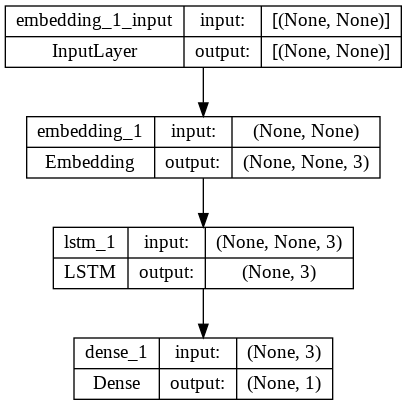

In [37]:
from tensorflow.keras.utils import plot_model 

plot_model(model, show_shapes = True)

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), # dense층에 activation = 'sigmoid'를 안했을 경우
    metrics = ['acc']
)

padded, train_y

In [38]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['acc']
)

padded, train_y

(array([[ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 2,  3,  4,  5,  6,  7,  0,  0,  0,  0],
        [ 8,  9, 10,  0,  0,  0,  0,  0,  0,  0],
        [11,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int32),
 array([1, 1, 0, 0]))

In [39]:
model.fit(padded, train_y, epochs=300)

Epoch 1/300
1/1 [==============================] - 8s 8s/step - loss: 0.6932 - acc: 0.5000
Epoch 2/300
1/1 [==============================] - 0s 8ms/step - loss: 0.6932 - acc: 0.5000
Epoch 3/300
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - acc: 0.5000
Epoch 4/300
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - acc: 0.5000
Epoch 5/300
1/1 [==============================] - 0s 8ms/step - loss: 0.6930 - acc: 0.5000
Epoch 6/300
1/1 [==============================] - 0s 8ms/step - loss: 0.6929 - acc: 0.5000
Epoch 7/300
1/1 [==============================] - 0s 7ms/step - loss: 0.6929 - acc: 0.5000
Epoch 8/300
1/1 [==============================] - 0s 9ms/step - loss: 0.6928 - acc: 0.5000
Epoch 9/300
1/1 [==============================] - 0s 8ms/step - loss: 0.6928 - acc: 0.5000
Epoch 10/300
1/1 [==============================] - 0s 9ms/step - loss: 0.6927 - acc: 0.5000
Epoch 11/300
1/1 [==============================] - 0s 7ms/step - loss: 0.6927 -

In [47]:
# 모델 성능 확인
model.evaluate(padded_test, np.array(test_y))

1/1 [==============================] - 0s 18ms/step - loss: 0.1584 - acc: 1.0000


[0.1583881378173828, 1.0]

In [48]:
model.predict(padded_test)

1/1 [==============================] - 0s 16ms/step


array([[0.11537157],
       [0.84081686],
       [0.8359425 ]], dtype=float32)

In [ ]:
# activation sigmoid 안줬을경우
import tensorflow as tf 
tf.keras.activations.sigmoid(model.predict(padded_test))